In [1]:
import pytorch3d
import torch

from pytorch3d.structures import Meshes
import matplotlib.pyplot as plt
from pytorch3d.ops import sample_points_from_meshes
from pytorch3d.io import load_obj, save_obj, IO

import os


from mpl_toolkits.mplot3d import Axes3D

from pytorch3d.renderer import BlendParams

from pytorch3d.renderer import (
    look_at_view_transform,
    FoVPerspectiveCameras, 
    PointLights, 
    DirectionalLights, 
    Materials, 
    RasterizationSettings, 
    MeshRenderer, 
    MeshRasterizer,  
    SoftPhongShader,
    TexturesUV,
    TexturesVertex,
    SoftSilhouetteShader,
    Textures
    
)
from pytorch3d.io import load_objs_as_meshes, load_obj

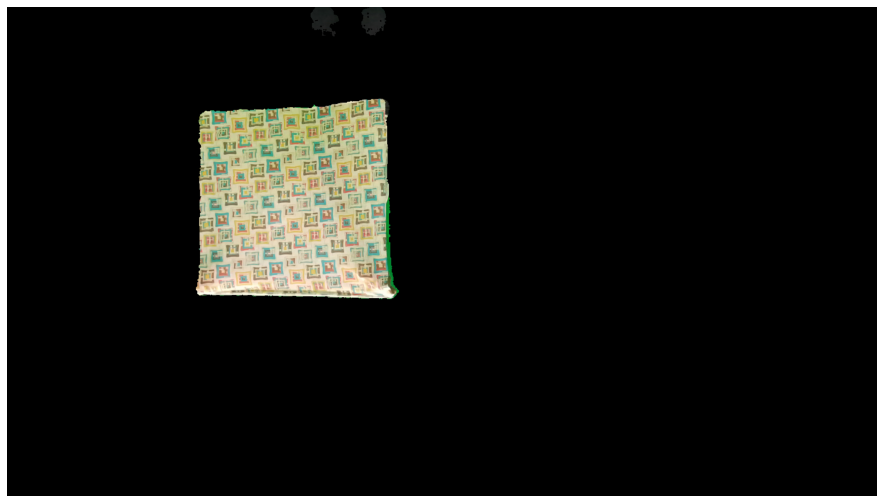

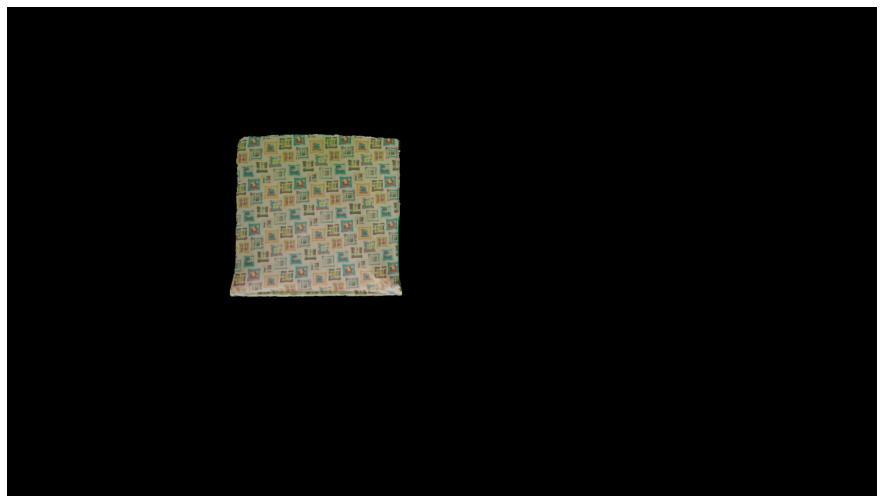

In [11]:
#verts, faces, aux = load_obj("real/S1/templates/template_mesh_final_textured.obj", device="cuda:0")
#faces_idx = faces.verts_idx
#trg_mesh = Meshes(verts=[verts], faces=[faces_idx])
DATA_DIR = "./real"
obj_filename = os.path.join(DATA_DIR, "S1/templates/template_mesh_final_textured.obj")
device = ("cuda:0" if torch.cuda.is_available() else "cpu")

mesh = load_objs_as_meshes([obj_filename], device=device)

R, T = look_at_view_transform(2.7, 0, 0) 
cameras = FoVPerspectiveCameras(device="cuda:0", R=R, T=T)

raster_settings = RasterizationSettings(
image_size=(1080, 1920), 
blur_radius=0.0, 
faces_per_pixel=1, 
)
lights = PointLights(device="cuda:0", location=[[1.0, 0.0, 3.0]])

renderer = MeshRenderer(
rasterizer=MeshRasterizer(
    cameras=cameras, 
    raster_settings=raster_settings
),
shader=SoftPhongShader(
    device="cuda:0", 
    cameras=cameras,
    lights=lights,
    blend_params=BlendParams(1e-4, 1e-4, (0.0,0.0,0.0))
)
)

plt.figure(figsize=(16,9))
texture_image=mesh.textures.maps_padded()
plt.imshow(texture_image.squeeze().cpu().numpy())
plt.axis("off");
images = renderer(mesh)
plt.figure(figsize=(16, 9))
plt.imshow(images[0, ..., :3].detach().cpu().numpy())
plt.axis("off");
plt.show()
